- Here I am exploring the FIFA set where I am predicting the what factors dectate whether  a player is special and find a satisfactory model that will predict whether a player is special with a high r^2 value. 

- This is a big dataset with 90 attributes and 18k+ players.

- Other point to remember is that I have not split the training and testing dataset in the beginning itself. In general splitting of data should be done in the beginning itself to avoid any data carryover.

The link to the dataset is as follows:
https://www.kaggle.com/karangadiya/fifa19

The biggest challenges with this dataset are:
- Missing values
- Lost of data
- Many groups for categorical dataset
- Cleaning data with a mixture of values like €565K
-  Performing upsampling 

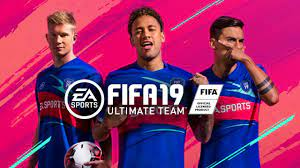

***IMPORTING THE LIBRARIES***

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
pip install -U scikit-learn


Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


In [ ]:
import matplotlib.pyplot as plt

MOUNTING THE GOOGLE DRIVE



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***LOADING AND EXPLORING THE DATASET***

In [ ]:
df_2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/regression_file.csv")
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(df_2)

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

         Value   Wage  Special Preferred Foot  International Reputation  \
0      €110.5M  €565K     2202           Left                       5.0   
1         €77M  €405K     2228          Right                       5.0   
2      €118.5M  €290K     2143          Right                       5.0   
3         €72M  €260K     1471          Right                       4.0   
4        €102M  €355K     2281          Right                       4.0   
...        ...    ...      ...            ...                       ...   
18202     €60K    €1K     1307          Right                       1.0   
18203     €60K    €1K     1098          Right                       1.0   
18204     €60K    €1K     1189          Right                       1.0   
18205     €60K    €1K     1228          Right    

***EXPLORING THE DATASET***

In [ ]:
df_2.describe()

Unnamed: 0             ID  ...  GKPositioning    GKReflexes
count  18207.000000   18207.000000  ...   18159.000000  18159.000000
mean    9103.000000  214298.338606  ...      16.388898     16.710887
std     5256.052511   29965.244204  ...      17.034669     17.955119
min        0.000000      16.000000  ...       1.000000      1.000000
25%     4551.500000  200315.500000  ...       8.000000      8.000000
50%     9103.000000  221759.000000  ...      11.000000     11.000000
75%    13654.500000  236529.500000  ...      14.000000     14.000000
max    18206.000000  246620.000000  ...      90.000000     94.000000

[8 rows x 44 columns]

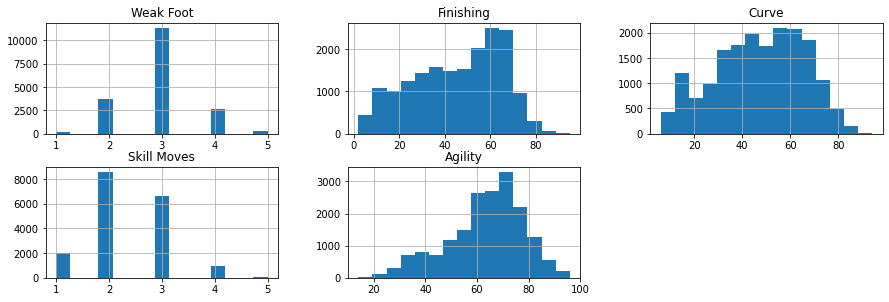

In [ ]:
columns=['Work Rate','Weak Foot','Wage','Finishing','Curve','Skill Moves','Agility']
df_2[columns].hist(bins=15, layout=(4, 3), figsize=(15,10)) # 3 rows and 3 columns # figure size is the spread of the histogram
plt.show()

Here we get a bit of idea about the dataset.


*   Maximum age of player is 45
*   Most players have a skill level of 2
*   The agility of most players is 70
*   Our predictor column - Wage is currrently a categorical column





*BOXPLOT*

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


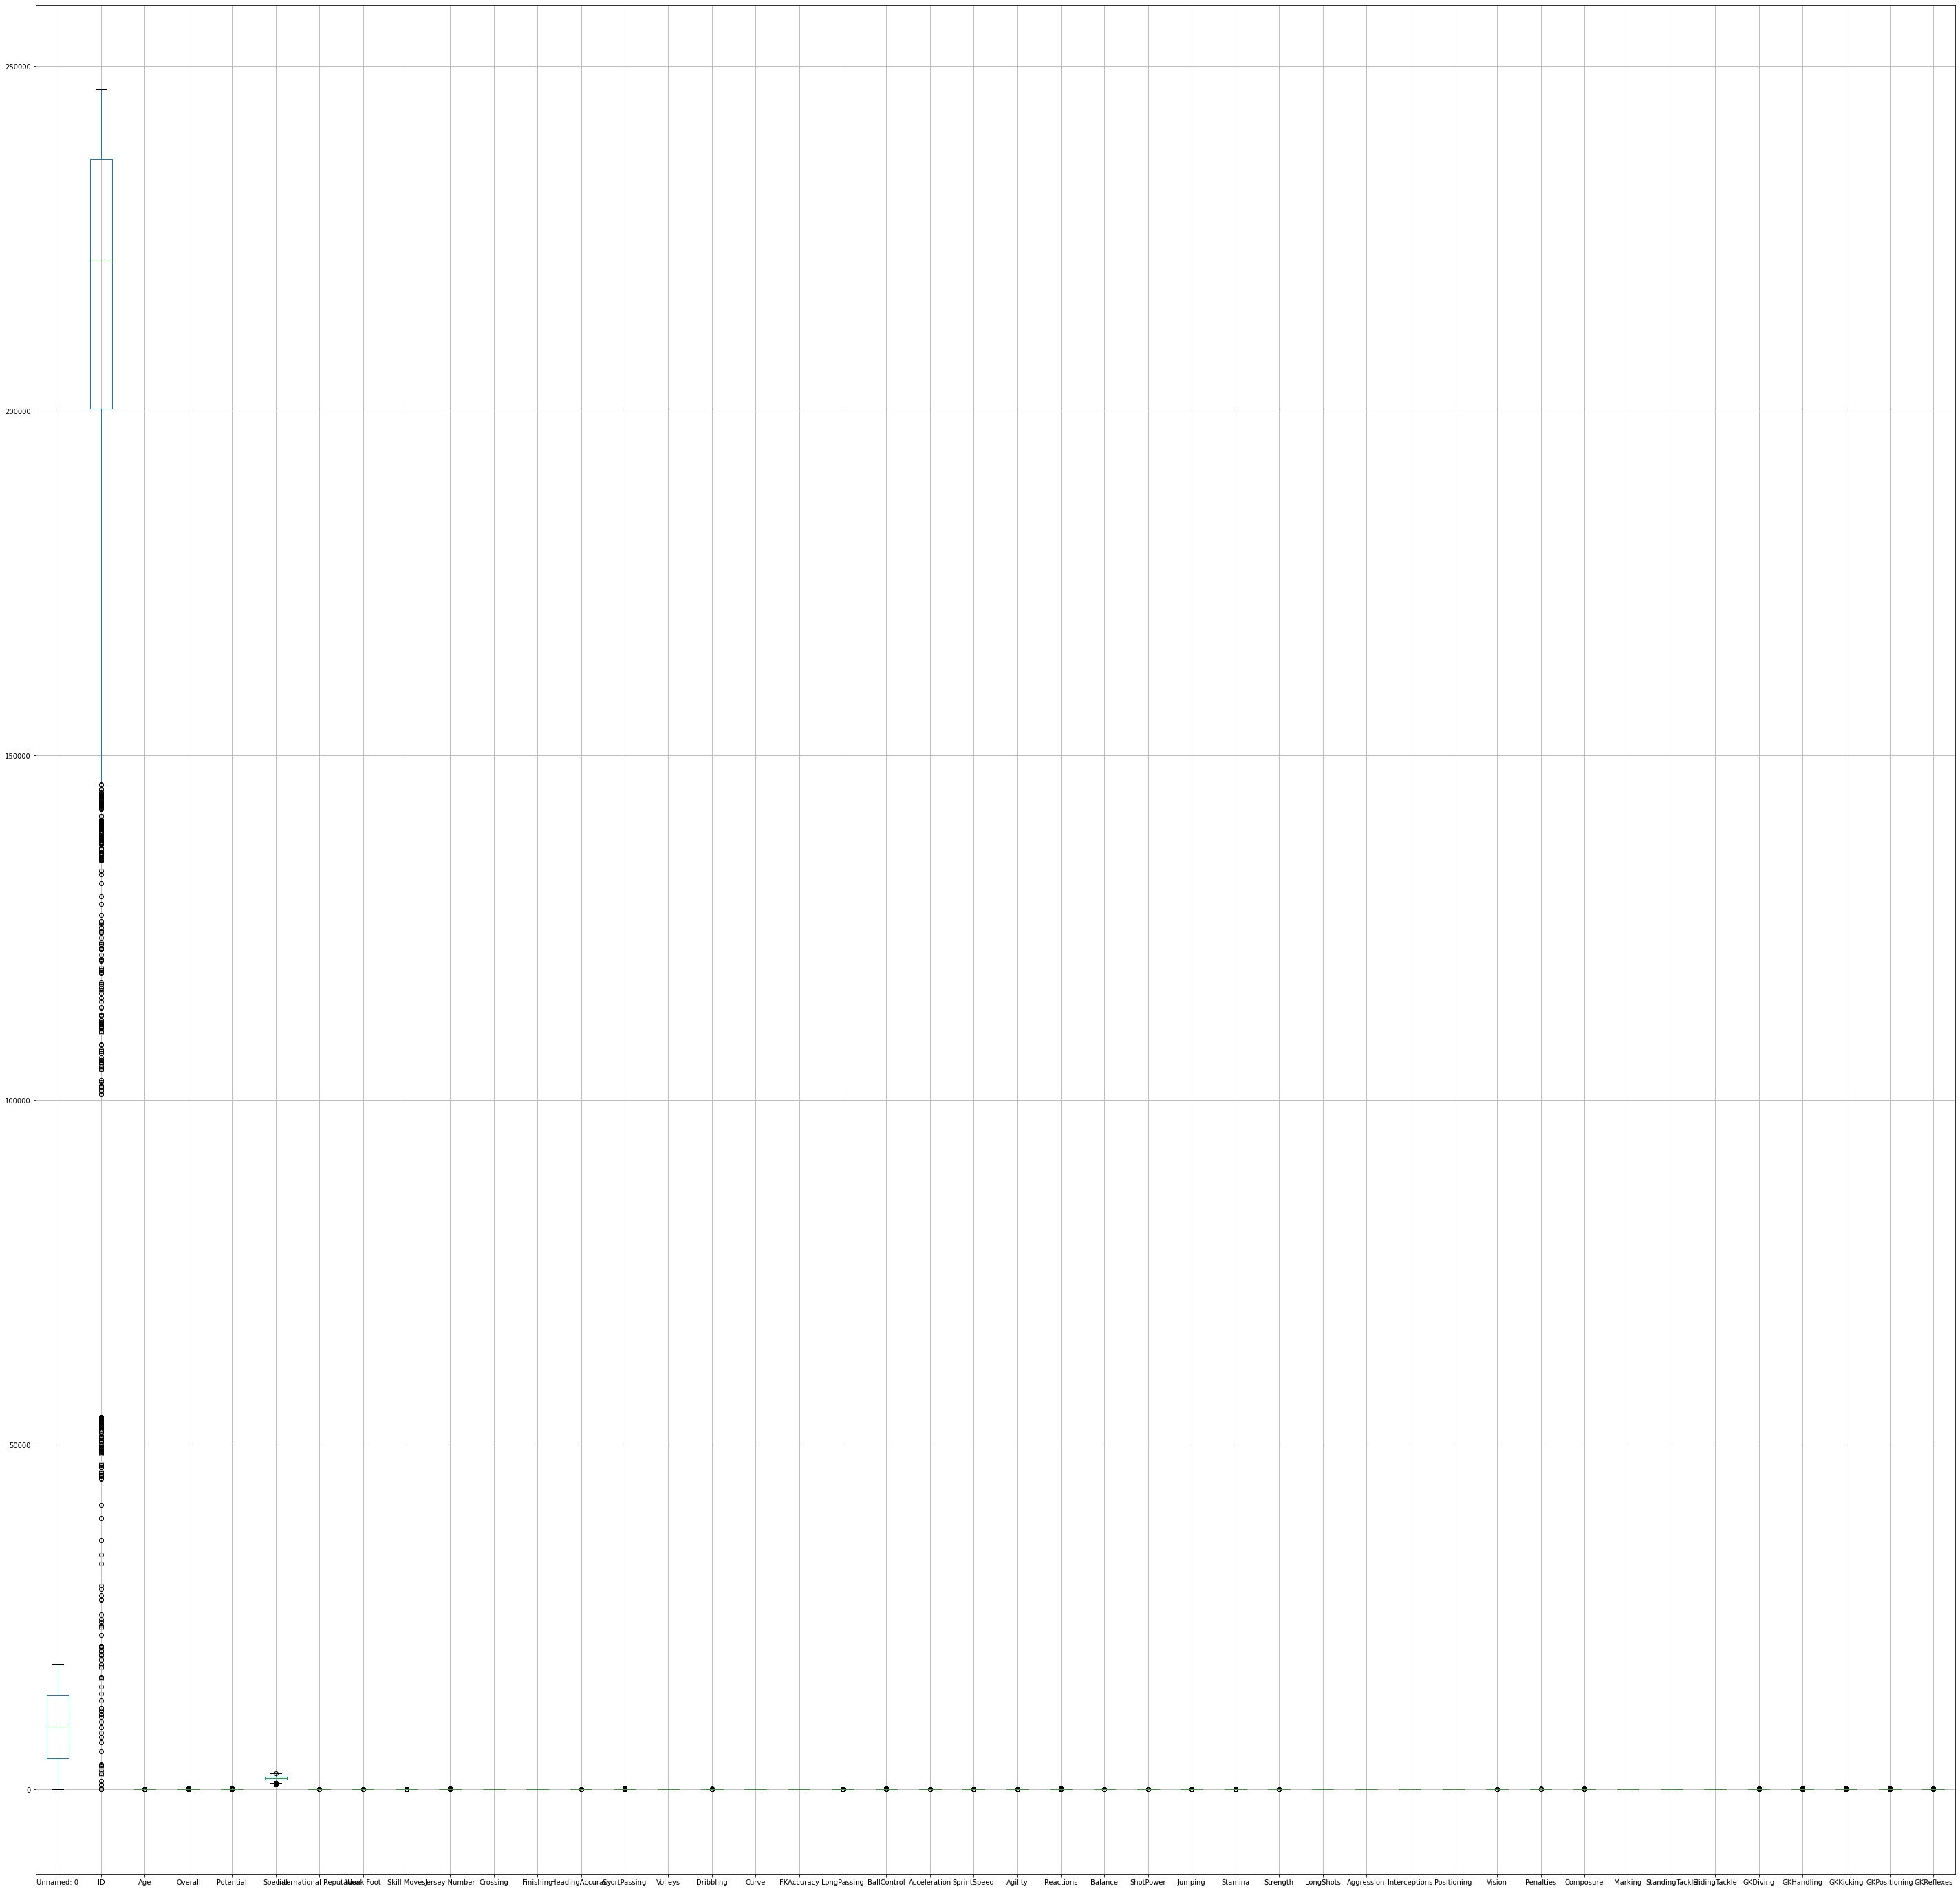

In [ ]:
plt.figure(figsize=(50,50))
df_2.boxplot()

Comments:

- Unnamed:0, ID, and speed have the maximum outliers that need to be handled.

***CORRELATION BETWEEN VARIOUS ATTRIBUTES***

In [ ]:
df=df_2.copy()

I first try to find correlation by three ways

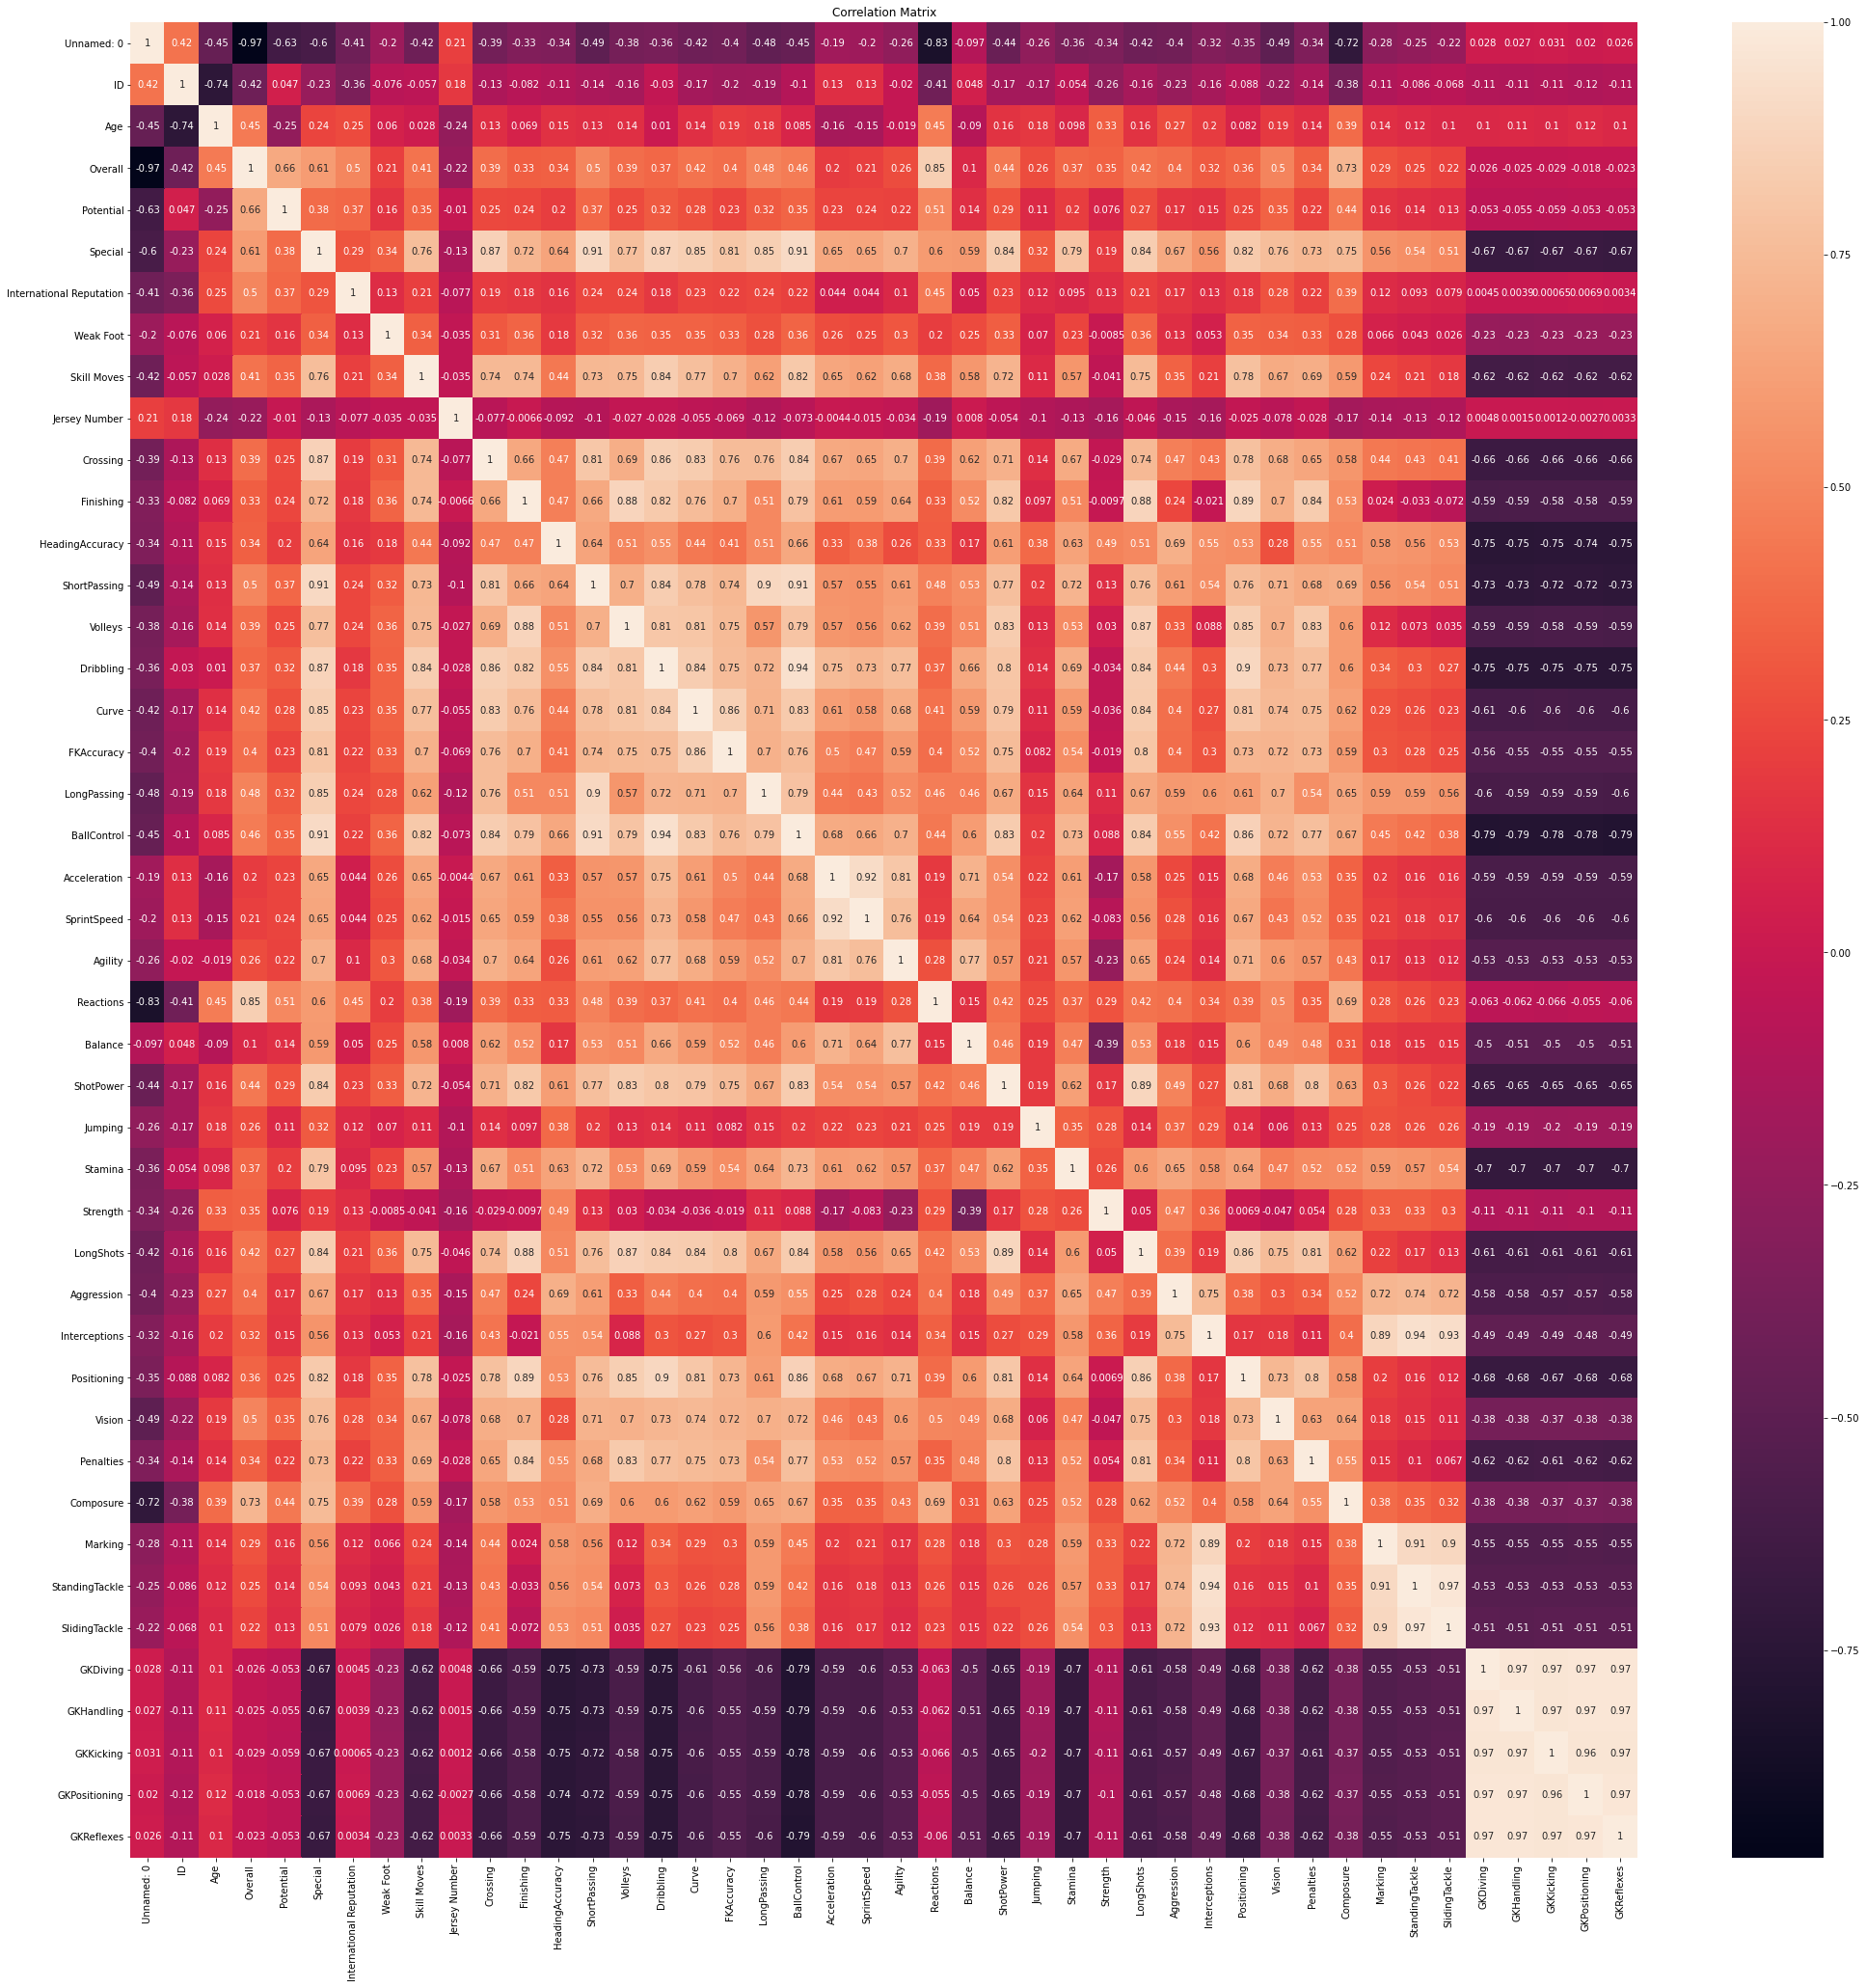

In [ ]:
plt.figure(figsize=(35,35))
plt.title("Correlation Matrix")
sns.heatmap(data = df.corr(), annot=True)

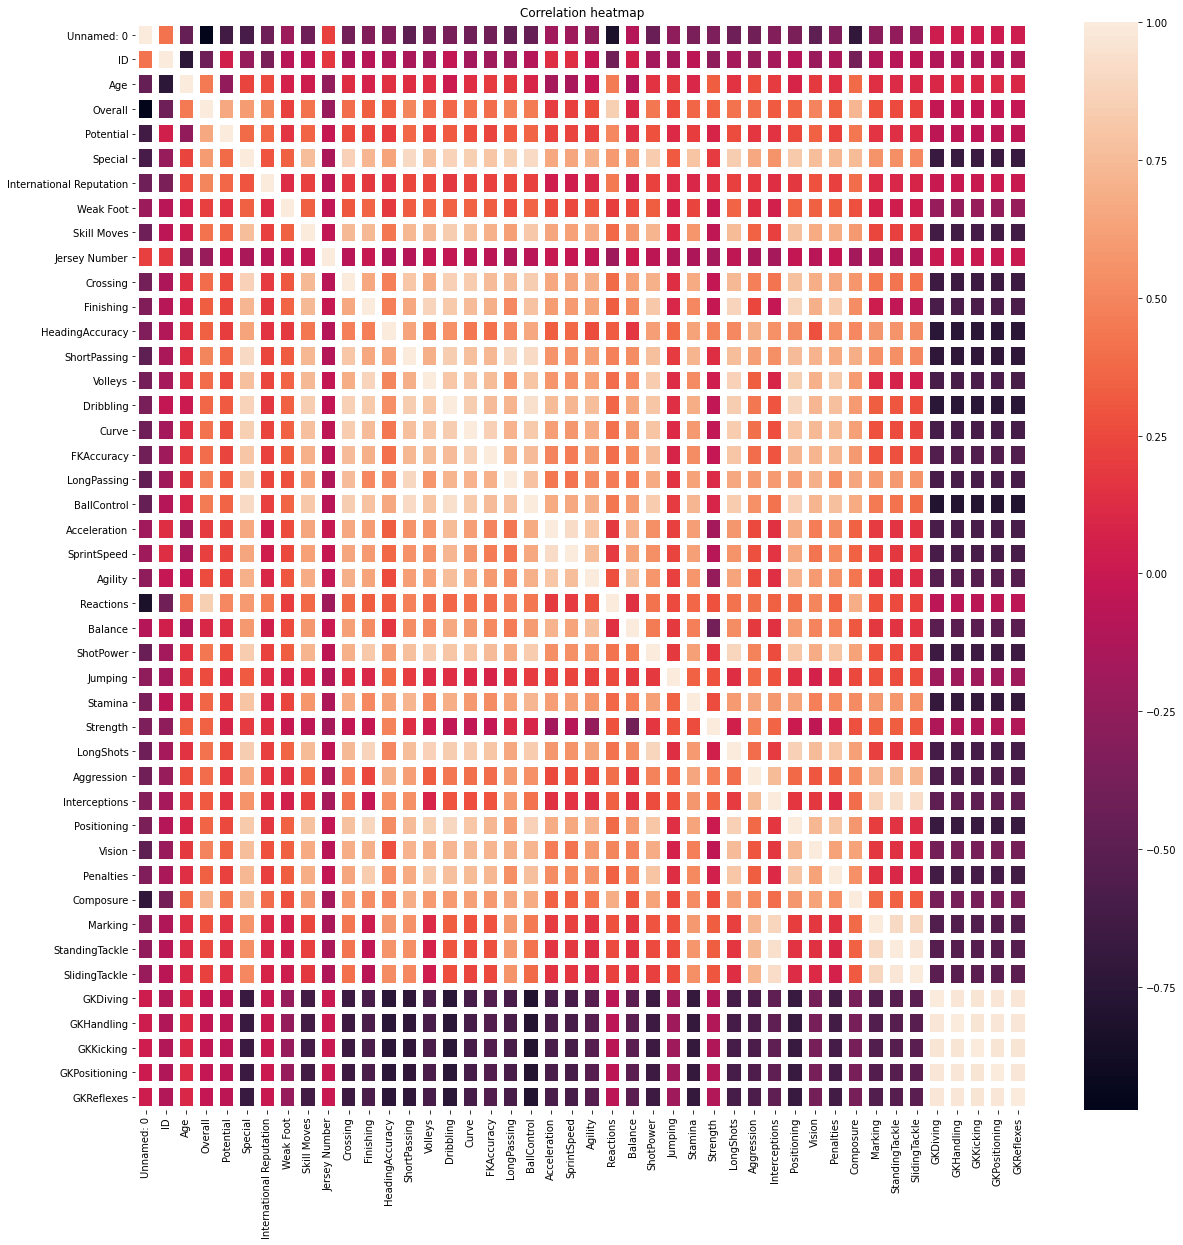

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=6)
plt.title('Correlation heatmap')
plt.show()

In [ ]:
corr_matrix=df.corr() #pearson correlation
corr_matrix

Unnamed: 0        ID  ...  GKPositioning  GKReflexes
Unnamed: 0                  1.000000  0.415757  ...       0.019842    0.025610
ID                          0.415757  1.000000  ...      -0.118250   -0.105778
Age                        -0.454846 -0.739208  ...       0.116402    0.103313
Overall                    -0.972791 -0.417025  ...      -0.017674   -0.023276
Potential                  -0.633395  0.047074  ...      -0.052589   -0.053341
Special                    -0.596508 -0.231352  ...      -0.668272   -0.673238
International Reputation   -0.413322 -0.356191  ...       0.006904    0.003444
Weak Foot                  -0.204026 -0.075784  ...      -0.231298   -0.232574
Skill Moves                -0.415672 -0.056914  ...      -0.618853   -0.621925
Jersey Number               0.213645  0.182074  ...      -0.002736    0.003255
Crossing                   -0.390062 -0.131994  ...      -0.660160   -0.662539
Finishing                  -0.325529 -0.082323  ...      -0.584852   -0.586913
HeadingAccuracy            -0.337766 -0.106815  ...      -0.744443   -0.748895
ShortPassing               -0.492495 -0.136279  ...      -0.723782   -0.728721
Volleys                    -0.384285 -0.159915  ...      -0.586131   -0.588670
Dribbling                  -0.364106 -0.030340  ...      -0.751348   -0.754341
Curve                      -0.416378 -0.169511  ...      -0.603540   -0.604960
FKAccuracy                 -0.395433 -0.199549  ...      -0.552641   -0.554920
LongPassing                -0.477500 -0.186764  ...      -0.591561   -0.595887
BallControl                -0.449655 -0.100184  ...      -0.783607   -0.787939
Acceleration               -0.185030  0.133236  ...      -0.592143   -0.593201
SprintSpeed                -0.198797  0.132437  ...      -0.596498   -0.597837
Agility                    -0.256270 -0.019897  ...      -0.526983   -0.528899
Reactions                  -0.832156 -0.408617  ...      -0.055031   -0.059961
Balance                    -0.097160  0.048463  ...      -0.503652   -0.505974
ShotPower                  -0.440023 -0.166133  ...      -0.651409   -0.653475
Jumping                    -0.261581 -0.169369  ...      -0.189079   -0.192050
Stamina                    -0.358451 -0.053895  ...      -0.696073   -0.699670
Strength                   -0.342839 -0.259756  ...      -0.103878   -0.107497
LongShots                  -0.417853 -0.161549  ...      -0.607200   -0.610087
Aggression                 -0.397067 -0.228329  ...      -0.571201   -0.575142
Interceptions              -0.319162 -0.160602  ...      -0.481279   -0.486036
Positioning                -0.351820 -0.088330  ...      -0.675569   -0.678582
Vision                     -0.490296 -0.215170  ...      -0.375775   -0.381158
Penalties                  -0.337899 -0.140657  ...      -0.617074   -0.619099
Composure                  -0.716173 -0.384473  ...      -0.370234   -0.377626
Marking                    -0.280829 -0.110198  ...      -0.546670   -0.551290
StandingTackle             -0.248564 -0.085929  ...      -0.527792   -0.531474
SlidingTackle              -0.220034 -0.068409  ...      -0.505792   -0.509425
GKDiving                    0.027757 -0.105594  ...       0.969864    0.973320
GKHandling                  0.027026 -0.111149  ...       0.969408    0.970264
GKKicking                   0.030654 -0.106652  ...       0.964336    0.966337
GKPositioning               0.019842 -0.118250  ...       1.000000    0.970130
GKReflexes                  0.025610 -0.105778  ...       0.970130    1.000000

[44 rows x 44 columns]

Comments:

- Clearly, Age, Potential, Weak Foot, GKHandking, GKPositioning, Slidig Trackle, Special,GK Handling, GKKicking, GK Reflexes, Wages, Strength, Balance have a coreelation with each other.

- We can clearly see from these heatmap that 'Special' feature of the dataset is somewhat strongly correlated with many features which are having missing values.
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing','Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing','BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions','Balance', 'ShotPower','Stamina','LongShots','Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties','Composure', 'Marking','GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'

- Height and Weight doesn't have good correlation with any other features. So we will impute this using some stats imputations technique after getting the pair plot below.

Once we have identified the missing numerical values we then try to itentify its relationship with the target using a pairplot and we then try to figure out whether we should apply the knn imputation or linear imputation

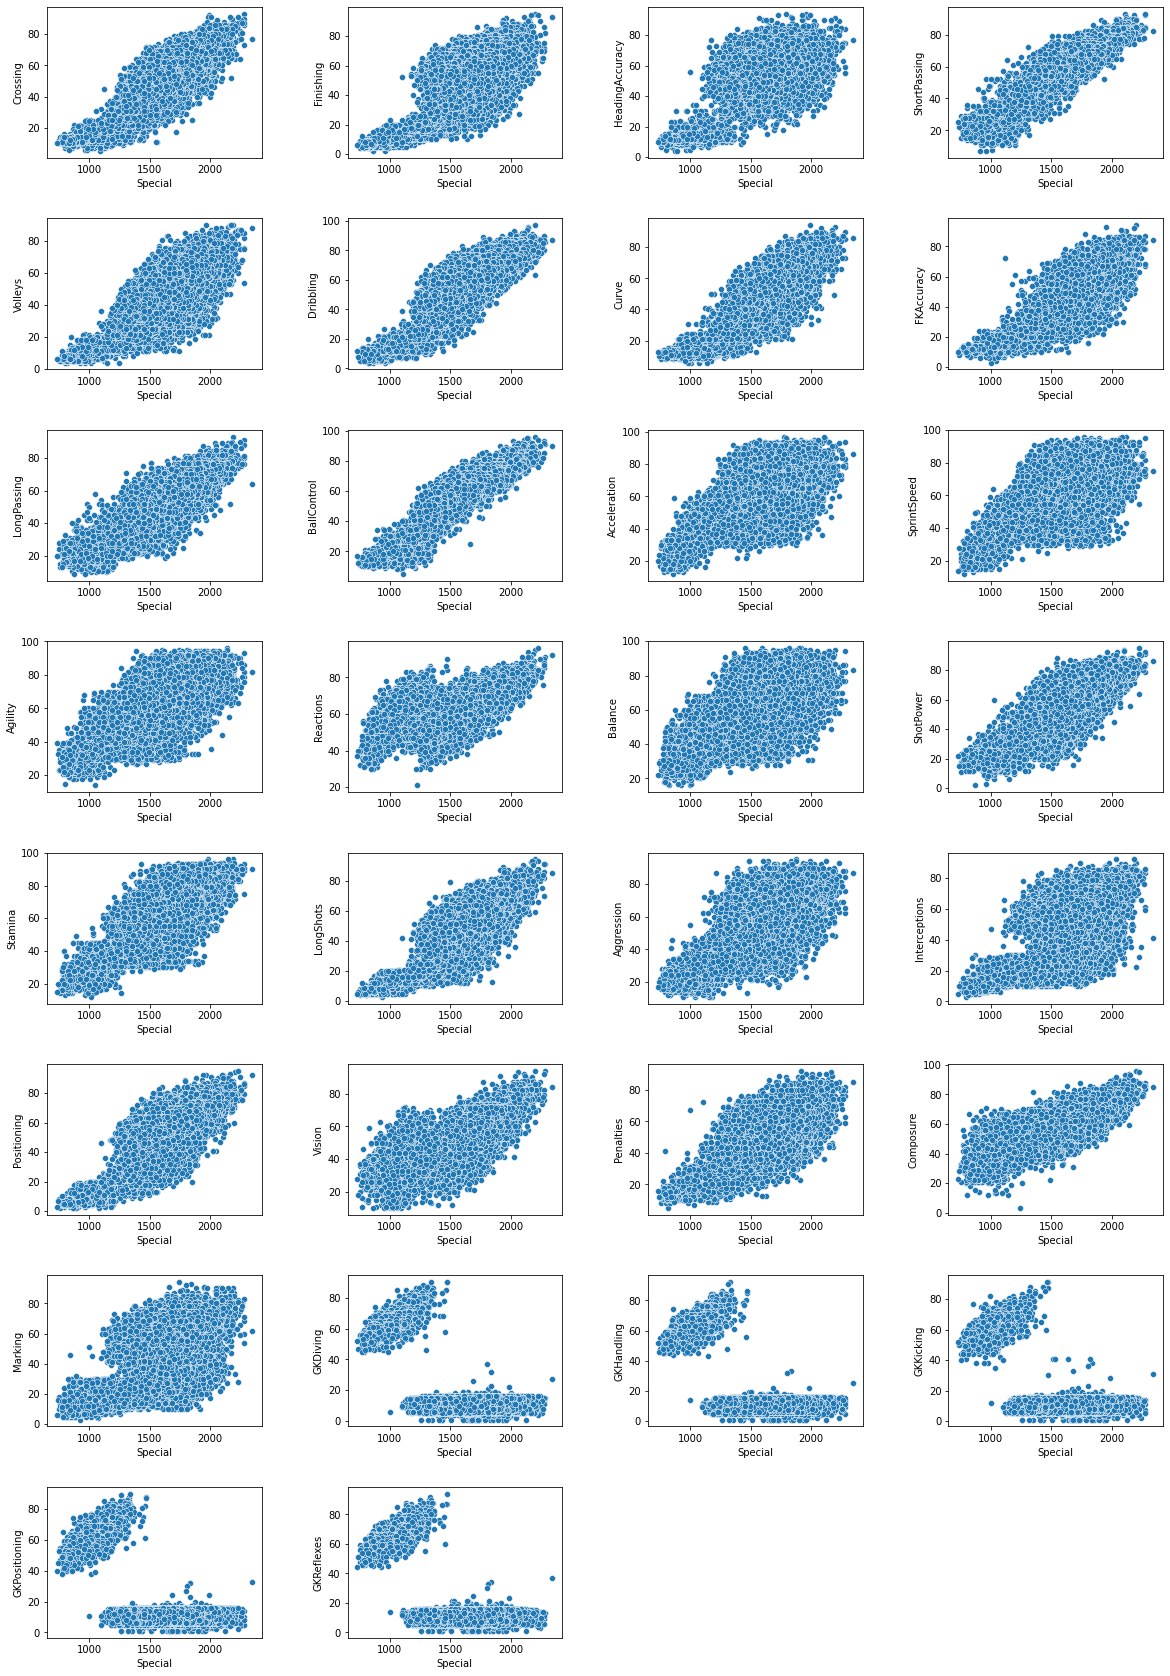

In [ ]:
features =  ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing','Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing','BallControl', 
            'Acceleration', 'SprintSpeed', 'Agility', 'Reactions','Balance', 'ShotPower','Stamina','LongShots','Aggression', 'Interceptions', 
            'Positioning', 'Vision', 'Penalties','Composure', 'Marking','GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

fig = plt.figure(figsize=(20,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
count=1
for feature in features:
    ax = fig.add_subplot(len(features)//4+1, 4, count)
    sns.scatterplot(x=df['Special'], y=df[feature])
    count +=1

- As we can see from above scatter plots in which many features are compaired from 'Special' features. We see a linear relationship except some features('GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'). So these feature can be imputed by Linear Imputation.
- And we can see features like :- ('GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes') are making 2 group. So we can imputed this by KNN imputation.


# ***FEATURE ENGINEERING***



1. *Missing Values* 
 
 - Handling missing values by exploring colummn by column

 - Methadology applied:
 1. If the columns containing categorical values contain any missing values, I will replace the missing values with mode. In case of a regression data I will replace it with median.

   2. Also if a row or column where half of the values are missing, I will delete those column all together

I first try to investigate the missing values using the following three ways

In [ ]:
pd.options.display.min_rows = 100
df.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

48 is repeating many times lets check if all of them are same ID or not

In [ ]:
missing_ir = df[df['International Reputation'].isnull()].index.tolist()

missing_ss = df[df['SprintSpeed'].isnull()].index.tolist()
if missing_ss == missing_ir:
    print('They are same')
else:
    print('They are different')

They are same


Removing the rows where 48 is repeated all together

In [ ]:
df.drop(df.index[missing_ir],inplace =True)

In [ ]:
df.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Real Face                       0
Position                       12
Jersey Number                  12
Joined                       1505
Loaned From                 16895
Contract Valid Until          241
Height                          0
Weight                          0
LS                           2037
ST            

Those rows have been removed

Handling missing values

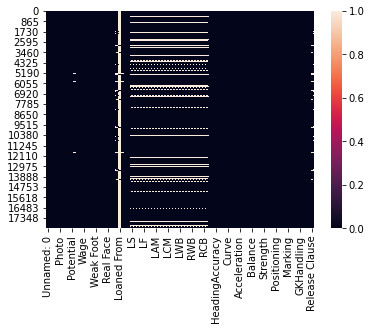

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.shape

(18159, 89)

OBSERVATIONS

*   Looks like Loaned Form is missing a lot of values so I will delete that column 
The following columns are not contributing to getting the Wage so i will delete them as well:
*   Photo 
*   Unnamed: 0
*   Flag
*   ID
*   Club Logo
*   Joined
*   Jersey Number
*   Name

A total of 9 columns need to be deleted to begin with







In [ ]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo','Joined','ID','Name','Jersey Number' ],axis=1,inplace=True)


In [ ]:
df.drop(['Loaned From'], axis = 1, inplace= True)

In [ ]:
df.shape

(18159, 80)

In [ ]:
df.head(2)

Age Nationality  Overall  ...  GKPositioning GKReflexes Release Clause
0   31   Argentina       94  ...           14.0        8.0        €226.5M
1   33    Portugal       94  ...           14.0       11.0        €127.1M

[2 rows x 80 columns]

VISUALING THE MISSING VALUES

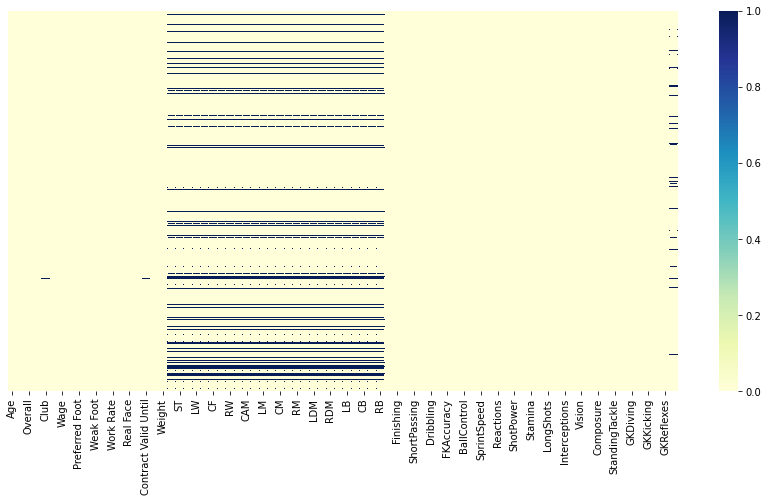

In [ ]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(df.isna(), yticklabels=False, cmap='YlGnBu')

Missung values continued:

*Handling categorical values*

Replacing the columns that had categorical values using mode for 
Club, Preferred Foot, Work Rate, Body Type, Real Face, Position, Height

In [ ]:
impute_mode = df.loc[:, ['Club', 'Preferred Foot','Work Rate','Body Type','Real Face','Position','Height']]
for i in impute_mode.columns:
    df[i].fillna(df[i].mode()[0], inplace = True)

*Handling numerical values*

For the numerical values we first need to convert them from strings to proper format before they can be handled

*Handing data in columns which have mix of categorical and numerical data*.
We willbe focussing on the following columns:

*   Wage
*   Release Clause
*   Height
*   Weight
*   Value



In [ ]:
df["Weight"] = df["Weight"].str.split("lbs", n = 1, expand = True)
df["Weight"]

0        159
1        183
2        150
3        168
4        154
5        163
6        146
7        190
8        181
9        192
10       176
11       168
12       172
13       148
14       159
15       165
16       196
17       161
18       187
19       212
20       168
21       170
22       203
23       154
24       187
25       161
26       157
27       185
28       172
29       130
        ... 
18177    163
18178    176
18179    163
18180    172
18181    134
18182    165
18183    190
18184    179
18185    159
18186    174
18187    161
18188    148
18189    165
18190    176
18191    168
18192    165
18193    146
18194    187
18195    141
18196    146
18197    141
18198    154
18199    150
18200    157
18201    168
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 18159, dtype: object

In [ ]:
df['Value'] = df['Value'].str.replace('€','').str.replace('M',' 1000000').str.replace('K',' 1000')
df['Value'] = df['Value'].str.split(' ', expand=True)[0].astype(float) * df['Value'].str.split(' ', expand=True)[1].astype(float)
df['Value'] = df['Value'].fillna(0).astype(np.float32)
df['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
5         93000000.0
6         67000000.0
7         80000000.0
8         51000000.0
9         68000000.0
10        77000000.0
11        76500000.0
12        44000000.0
13        60000000.0
14        63000000.0
15        89000000.0
16        83500000.0
17        78000000.0
18        58000000.0
19        53500000.0
20        51500000.0
21        60000000.0
22        38000000.0
23        64500000.0
24        27000000.0
25        81000000.0
26        69500000.0
27        59500000.0
28        69500000.0
29        62000000.0
            ...     
18177        70000.0
18178        50000.0
18179        50000.0
18180        40000.0
18181        50000.0
18182        50000.0
18183            0.0
18184        40000.0
18185        50000.0
18186        60000.0
18187        40000.0
18188        60000.0
18189        60000.0
18190        60000.0
18191        50000.0
18192        50000.0
18193        

In [ ]:
df['Wage'] = df['Wage'].str.replace('€','').str.replace('K',' 1000')
df['Wage'] = df['Wage'].str.split(' ', expand=True)[0].astype(float) * df['Wage'].str.split(' ', expand=True)[1].astype(float)
df['Wage'] = df['Wage'].fillna(0).astype(np.float32)
df['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
5        340000.0
6        420000.0
7        455000.0
8        380000.0
9         94000.0
10       205000.0
11       355000.0
12       125000.0
13       285000.0
14       225000.0
15       205000.0
16       205000.0
17       145000.0
18       240000.0
19       240000.0
20       315000.0
21       200000.0
22       130000.0
23       300000.0
24       215000.0
25       100000.0
26       255000.0
27       285000.0
28       315000.0
29       165000.0
           ...   
18177      1000.0
18178      1000.0
18179      1000.0
18180      1000.0
18181      1000.0
18182      1000.0
18183      1000.0
18184      1000.0
18185      1000.0
18186      1000.0
18187      1000.0
18188      1000.0
18189      1000.0
18190      1000.0
18191      1000.0
18192      1000.0
18193      1000.0
18194      1000.0
18195      1000.0
18196      1000.0
18197      1000.0
18198      1000.0
18199      1000.0
18200      1000.0
18201     

In [ ]:
df['Release Clause'] = df['Release Clause'].str.replace('€','').str.replace('M',' 1000000').str.replace('K',' 1000')
df['Release Clause'] = df['Release Clause'].str.split(' ', expand=True)[0].astype(float) * df['Release Clause'].str.split(' ', expand=True)[1].astype(float)
df['Release Clause'] = df['Release Clause'].fillna(0).astype(np.float32)
df['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
5        172100000.0
6        137400000.0
7        164000000.0
8        104600000.0
9        144500000.0
10       127100000.0
11       156800000.0
12        90200000.0
13       111000000.0
14       121300000.0
15       153500000.0
16       160700000.0
17       165800000.0
18       123300000.0
19       113700000.0
20       105600000.0
21       111000000.0
22        62700000.0
23       119300000.0
24        44600000.0
25       166100000.0
26       137300000.0
27       126400000.0
28               0.0
29       105400000.0
            ...     
18177       193000.0
18178        94000.0
18179       119000.0
18180        78000.0
18181       109000.0
18182       101000.0
18183            0.0
18184        78000.0
18185        88000.0
18186       167000.0
18187        66000.0
18188       143000.0
18189       125000.0
18190       165000.0
18191       119000.0
18192       119000.0
18193        

In [ ]:
df['Height'] = df['Height'].str.split("'", expand=True)[0].astype(float) * 12+ df['Height'].str.split("'", expand=True)[1].astype(float)
df['Height'] = df['Height'].fillna(0).astype(np.float32)
df['Height']

0        67.0
1        74.0
2        69.0
3        76.0
4        71.0
5        68.0
6        68.0
7        72.0
8        72.0
9        74.0
10       72.0
11       72.0
12       74.0
13       68.0
14       66.0
15       70.0
16       74.0
17       69.0
18       74.0
19       78.0
20       74.0
21       73.0
22       76.0
23       68.0
24       74.0
25       70.0
26       69.0
27       73.0
28       71.0
29       64.0
         ... 
18177    70.0
18178    72.0
18179    74.0
18180    73.0
18181    71.0
18182    70.0
18183    74.0
18184    73.0
18185    71.0
18186    70.0
18187    70.0
18188    70.0
18189    70.0
18190    69.0
18191    71.0
18192    73.0
18193    68.0
18194    75.0
18195    68.0
18196    67.0
18197    70.0
18198    71.0
18199    66.0
18200    69.0
18201    73.0
18202    69.0
18203    75.0
18204    68.0
18205    70.0
18206    70.0
Name: Height, Length: 18159, dtype: float32

***FINDING CORRELATIONS WITH THE TARGET VARIABLE***

In [ ]:
corr_matrix=df.corr()
corr_matrix.head()
corr_matrix["Special"].sort_values(ascending=False)

Special                     1.000000
BallControl                 0.912107
ShortPassing                0.906729
Dribbling                   0.874274
Crossing                    0.866417
Curve                       0.851900
LongPassing                 0.846302
LongShots                   0.840049
ShotPower                   0.835277
Positioning                 0.824307
FKAccuracy                  0.806414
Stamina                     0.792762
Volleys                     0.773974
Skill Moves                 0.763412
Vision                      0.761992
Composure                   0.752331
Penalties                   0.734533
Finishing                   0.724244
Agility                     0.699673
Aggression                  0.666236
Acceleration                0.654337
SprintSpeed                 0.645963
HeadingAccuracy             0.644421
Overall                     0.607236
Reactions                   0.597169
Balance                     0.586788
Marking                     0.561866
I

The following attributes should be kept into consideration when solving this problem dealing with Speciality variable:
- BallControl                 
- ShortPassing             
- Dribbling             
- Crossing              
- Curve                 
- LongPassing                
- LongShots                  
- ShotPower                   
- Positioning                
- FKAccuracy   


My criteria was to keep +/ve attributes above 0.8 into consideration

In [ ]:
df.shape

(18159, 80)

In [ ]:
df.isnull().sum()

Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Real Face                      0
Position                       0
Contract Valid Until         241
Height                         0
Weight                         0
LS                          2037
ST                          2037
RS                          2037
LW                          2037
LF                          2037
CF                          2037
RF                          2037
RW                          2037
LAM                         2037
CAM                         2037
RAM                         2037
          

Going back to missing value problem and investigating it further

Missing Values Visualisation

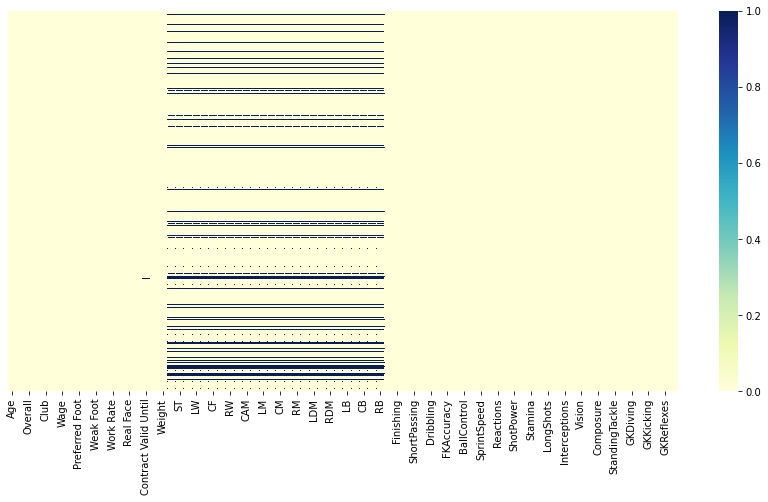

In [ ]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(df.isna(), yticklabels=False, cmap='YlGnBu')

In [ ]:
numerical_features =['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Height',
                   'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
                   'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                   'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                   'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                   'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                   'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
                   'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes','Release Clause']

categorical_features = ['Name','Nationality', 'Club', 'Preferred Foot', 'Work Rate','Body Type', 
                        'Position','International Reputation', 'Weak Foot', 'Skill Moves']

In [ ]:
df.describe().T

count          mean  ...        75%          max
Age                       18159.0  2.512253e+01  ...       28.0         45.0
Overall                   18159.0  6.624990e+01  ...       71.0         94.0
Potential                 18159.0  7.131913e+01  ...       75.0         95.0
Value                     18159.0  2.416175e+06  ...  2000000.0  118500000.0
Wage                      18159.0  9.751613e+03  ...     9000.0     565000.0
Special                   18159.0  1.597904e+03  ...     1787.0       2346.0
International Reputation  18159.0  1.113222e+00  ...        1.0          5.0
Weak Foot                 18159.0  2.947299e+00  ...        3.0          5.0
Skill Moves               18159.0  2.361308e+00  ...        3.0          5.0
Height                    18159.0  7.136125e+01  ...       73.0         81.0
Crossing                  18159.0  4.973418e+01  ...       64.0         93.0
Finishing                 18159.0  4.555091e+01  ...       62.0         95.0
HeadingAccuracy           18159.0  5.229814e+01  ...       64.0         94.0
ShortPassing              18159.0  5.868671e+01  ...       68.0         93.0
Volleys                   18159.0  4.290903e+01  ...       57.0         90.0
Dribbling                 18159.0  5.537100e+01  ...       68.0         97.0
Curve                     18159.0  4.717082e+01  ...       62.0         94.0
FKAccuracy                18159.0  4.286315e+01  ...       57.0         94.0
LongPassing               18159.0  5.271193e+01  ...       64.0         93.0
BallControl               18159.0  5.836946e+01  ...       69.0         96.0
Acceleration              18159.0  6.461408e+01  ...       75.0         97.0
SprintSpeed               18159.0  6.472697e+01  ...       75.0         96.0
Agility                   18159.0  6.350361e+01  ...       74.0         96.0
Reactions                 18159.0  6.183661e+01  ...       68.0         96.0
Balance                   18159.0  6.396657e+01  ...       74.0         96.0
ShotPower                 18159.0  5.546005e+01  ...       68.0         95.0
Jumping                   18159.0  6.508943e+01  ...       73.0         95.0
Stamina                   18159.0  6.321995e+01  ...       74.0         96.0
Strength                  18159.0  6.531197e+01  ...       74.0         97.0
LongShots                 18159.0  4.710997e+01  ...       62.0         94.0
Aggression                18159.0  5.586899e+01  ...       69.0         95.0
Interceptions             18159.0  4.669828e+01  ...       64.0         92.0
Positioning               18159.0  4.995848e+01  ...       64.0         95.0
Vision                    18159.0  5.340090e+01  ...       64.0         94.0
Penalties                 18159.0  4.854860e+01  ...       60.0         92.0
Composure                 18159.0  5.864827e+01  ...       67.0         96.0
Marking                   18159.0  4.728162e+01  ...       64.0         94.0
StandingTackle            18159.0  4.769784e+01  ...       66.0         93.0
SlidingTackle             18159.0  4.566144e+01  ...       64.0         91.0
GKDiving                  18159.0  1.661622e+01  ...       14.0         90.0
GKHandling                18159.0  1.639160e+01  ...       14.0         92.0
GKKicking                 18159.0  1.623206e+01  ...       14.0         91.0
GKPositioning             18159.0  1.638890e+01  ...       14.0         90.0
GKReflexes                18159.0  1.671089e+01  ...       14.0         94.0
Release Clause            18159.0  4.202157e+06  ...  3000000.0  228100000.0

[45 rows x 8 columns]

Out of the many options for computing missing values, constant works here

In [ ]:
constant = df.loc[:, ['Contract Valid Until','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','CM','RM','LDM','RDM','LB','CB','RB','CM','RCM','LCM','LWB','CDM','RWB','LCB','RCB']]
for i in constant.columns:
    df[i].fillna(1.0, inplace=True)

In [ ]:
impute_median = df.loc[:, ['International Reputation','Weak Foot','Skill Moves','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility',
                           'Reactions', 'Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]
for i in impute_median.columns:
    df[i].fillna(df[i].median())

In [ ]:
impute_mode_2 = df.loc[:, ['RS','LW','Contract Valid Until','Weight','RAM','CAM','LAM','RW','RF','CF','LF','RS','ST','LS','LCM','LWB','RWB']]
for i in impute_mode_2.columns:
    df[i].fillna(df[i].mode(), inplace = True)

In [ ]:
df.isnull().sum()

Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
LF                          0
CF                          0
RF                          0
RW                          0
LAM                         0
CAM                         0
RAM                         0
                           ..
Dribbling                   0
Curve                       0
FKAccuracy

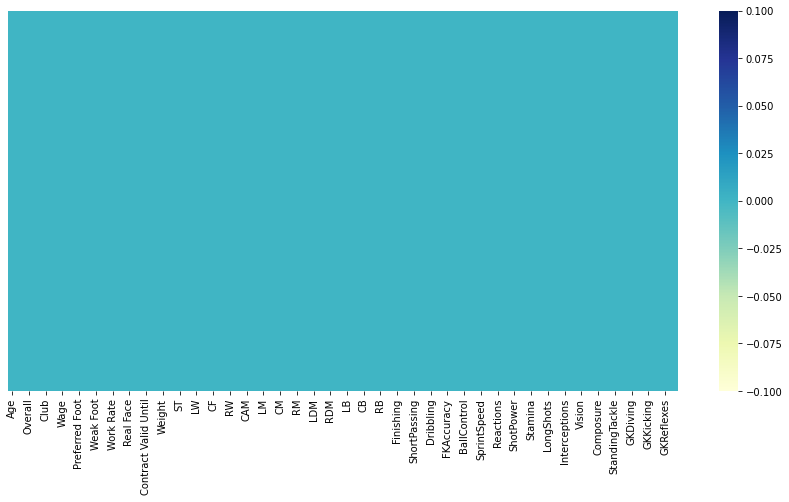

In [ ]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(df.isna(), yticklabels=False, cmap='YlGnBu')

2) ***Performing one hot encoding ***

Nationality Categorical Column

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
Nationality_cat_2hot = cat_encoder.fit_transform(df[['Nationality']])
Nationality_cat_toarray_2=Nationality_cat_2hot.toarray()
Nationality_cat_toarray_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df[['Nationality']].value_counts()

Nationality         
England                 1657
Germany                 1195
Spain                   1071
Argentina                936
France                   911
Brazil                   825
Italy                    699
Colombia                 616
Japan                    478
Netherlands              452
Sweden                   396
China PR                 390
Chile                    388
Republic of Ireland      368
Mexico                   365
United States            353
Poland                   348
Norway                   341
Saudi Arabia             337
Denmark                  335
Korea Republic           333
Portugal                 322
Turkey                   303
Austria                  296
Scotland                 283
Belgium                  259
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
                        ... 
Uzbekistan                 2
Chad                       2
Hong Kong             

Body Type Categorical Column

In [ ]:
Body_type_cat_2hot = cat_encoder.fit_transform(df[['Body Type']])
Body_type_cat_toarray_2=Body_type_cat_2hot.toarray()
Body_type_cat_toarray_2



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df[['Body Type']].value_counts()

Body Type          
Normal                 10595
Lean                    6417
Stocky                  1140
Shaqiri                    1
PLAYER_BODY_TYPE_25        1
Neymar                     1
Messi                      1
Courtois                   1
C. Ronaldo                 1
Akinfenwa                  1
dtype: int64

Real Face Categorical Column

In [ ]:
real_face_cat_2hot = cat_encoder.fit_transform(df[['Real Face']])
real_face_cat_toarray_2=real_face_cat_2hot.toarray()
real_face_cat_toarray_2

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
df[['Real Face']].value_counts()

Real Face
No           16505
Yes           1654
dtype: int64

Position Categorical Column

In [ ]:
position_cat_2hot = cat_encoder.fit_transform(df[['Position']])
position_cat_toarray_2=position_cat_2hot.toarray()
position_cat_toarray_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df[['Position']].value_counts()

Position
ST          2164
GK          2025
CB          1778
CM          1394
LB          1322
RB          1291
RM          1124
LM          1095
CAM          958
CDM          948
RCB          662
LCB          648
LCM          395
RCM          391
LW           381
RW           370
RDM          248
LDM          243
LS           207
RS           203
RWB           87
LWB           78
CF            74
RAM           21
LAM           21
RF            16
LF            15
dtype: int64

Club Categorical Column

In [ ]:
club_cat_2hot = cat_encoder.fit_transform(df[['Club']])
club_cat_toarray_2=club_cat_2hot.toarray()
club_cat_toarray_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df[['Club']].value_counts()

Club                     
AS Monaco                    274
Frosinone                     33
Tottenham Hotspur             33
Manchester United             33
Cardiff City                  33
Manchester City               33
Southampton                   33
Chelsea                       33
Valencia CF                   33
Fortuna Düsseldorf            33
RC Celta                      33
Borussia Dortmund             33
Burnley                       33
TSG 1899 Hoffenheim           33
Newcastle United              33
Rayo Vallecano                33
Wolverhampton Wanderers       33
Atlético Madrid               33
FC Barcelona                  33
Real Madrid                   33
Liverpool                     33
Eintracht Frankfurt           33
Empoli                        33
Arsenal                       33
CD Leganés                    33
VfL Wolfsburg                 32
Bournemouth                   32
Brighton & Hove Albion        32
Hertha BSC                    32
Villarreal CF    

Work Rate Categorical Column

In [ ]:
work_rate_cat_2hot = cat_encoder.fit_transform(df[['Work Rate']])
work_rate_cat_toarray_2=work_rate_cat_2hot.toarray()
work_rate_cat_toarray_2

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
df[['Work Rate']].value_counts()

Work Rate     
Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
dtype: int64

Preferred Foot Categorical Column

In [ ]:
preferred_foot_cat_2hot = cat_encoder.fit_transform(df[['Preferred Foot']])
preferred_foot_cat_toarray_2=preferred_foot_cat_2hot.toarray()
preferred_foot_cat_toarray_2

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
df[['Preferred Foot']].value_counts()

Preferred Foot
Right             13948
Left               4211
dtype: int64

The following attributes shouls be kept into consideration:
- BallControl
- ShortPassing
- Dribbling
- Overall
- Crossing
- Curve
- LongPassing
- LongShorts
- ShortPower
- Positioning
- FKAccuracy


The remaining attributes have been ignored for now to simplify the problem


In [ ]:
df = df.filter(['BallControl' ,'ShortPassing' , 'Dribbling' , 'Crossing', 'Curve' ,'LongPassing' ,'LongShots' ,'ShortPower','Positioning','FKAccuracy',"Special"])

In [ ]:
df.head()

BallControl  ShortPassing  Dribbling  ...  Positioning  FKAccuracy  Special
0         96.0          90.0       97.0  ...         94.0        94.0     2202
1         94.0          81.0       88.0  ...         95.0        76.0     2228
2         95.0          84.0       96.0  ...         89.0        87.0     2143
3         42.0          50.0       18.0  ...         12.0        19.0     1471
4         91.0          92.0       86.0  ...         87.0        83.0     2281

[5 rows x 10 columns]

In [ ]:
df.describe()

BallControl  ShortPassing  ...    FKAccuracy       Special
count  18159.000000  18159.000000  ...  18159.000000  18159.000000
mean      58.369459     58.686712  ...     42.863153   1597.903959
std       16.686595     14.699495  ...     17.478763    272.862270
min        5.000000      7.000000  ...      3.000000    731.000000
25%       54.000000     54.000000  ...     31.000000   1457.000000
50%       63.000000     62.000000  ...     41.000000   1635.000000
75%       69.000000     68.000000  ...     57.000000   1787.000000
max       96.000000     93.000000  ...     94.000000   2346.000000

[8 rows x 10 columns]

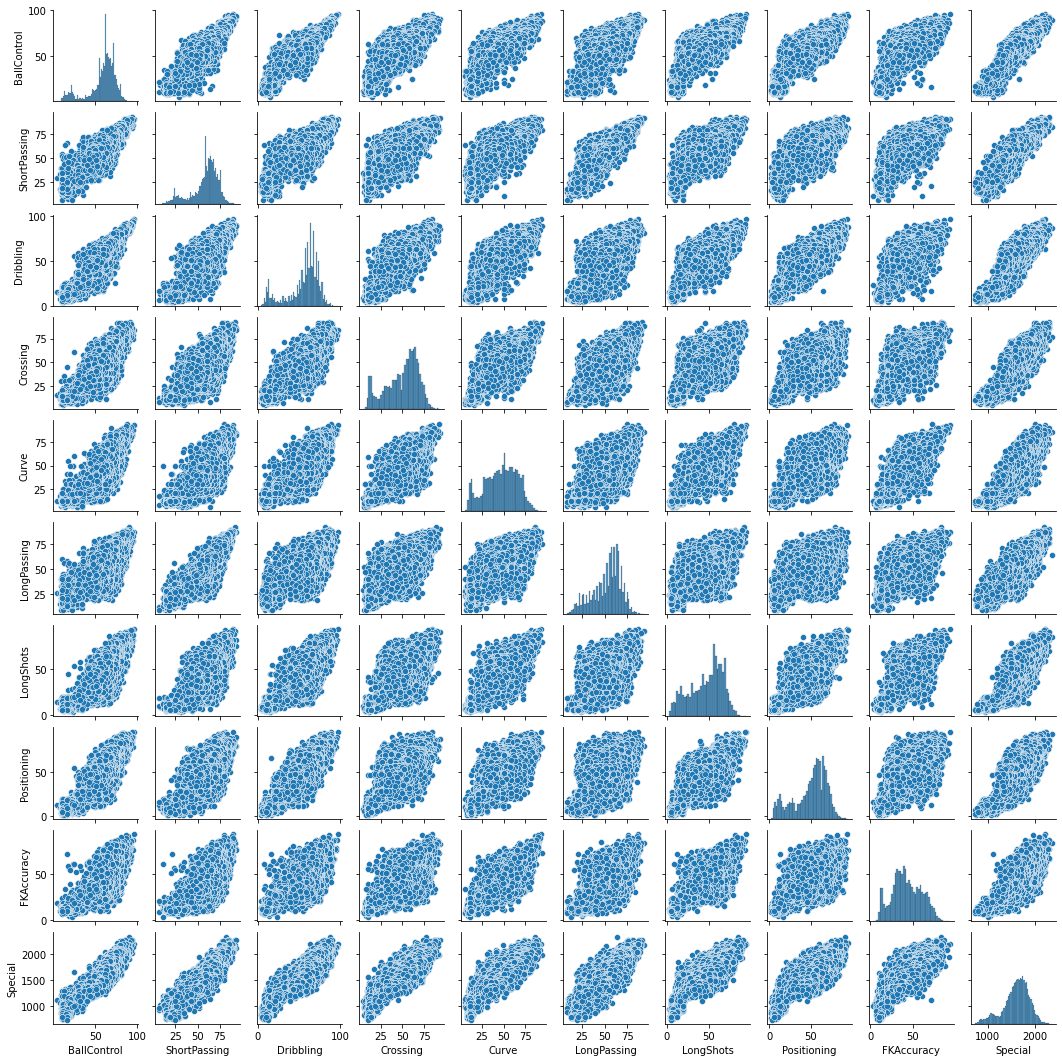

In [ ]:
sns.pairplot(df, height = 1.5)

In pair plot the x and y variables are overlapping and we need nonlinear algorithim to solve this problem

3)*** Removing of the outliers***

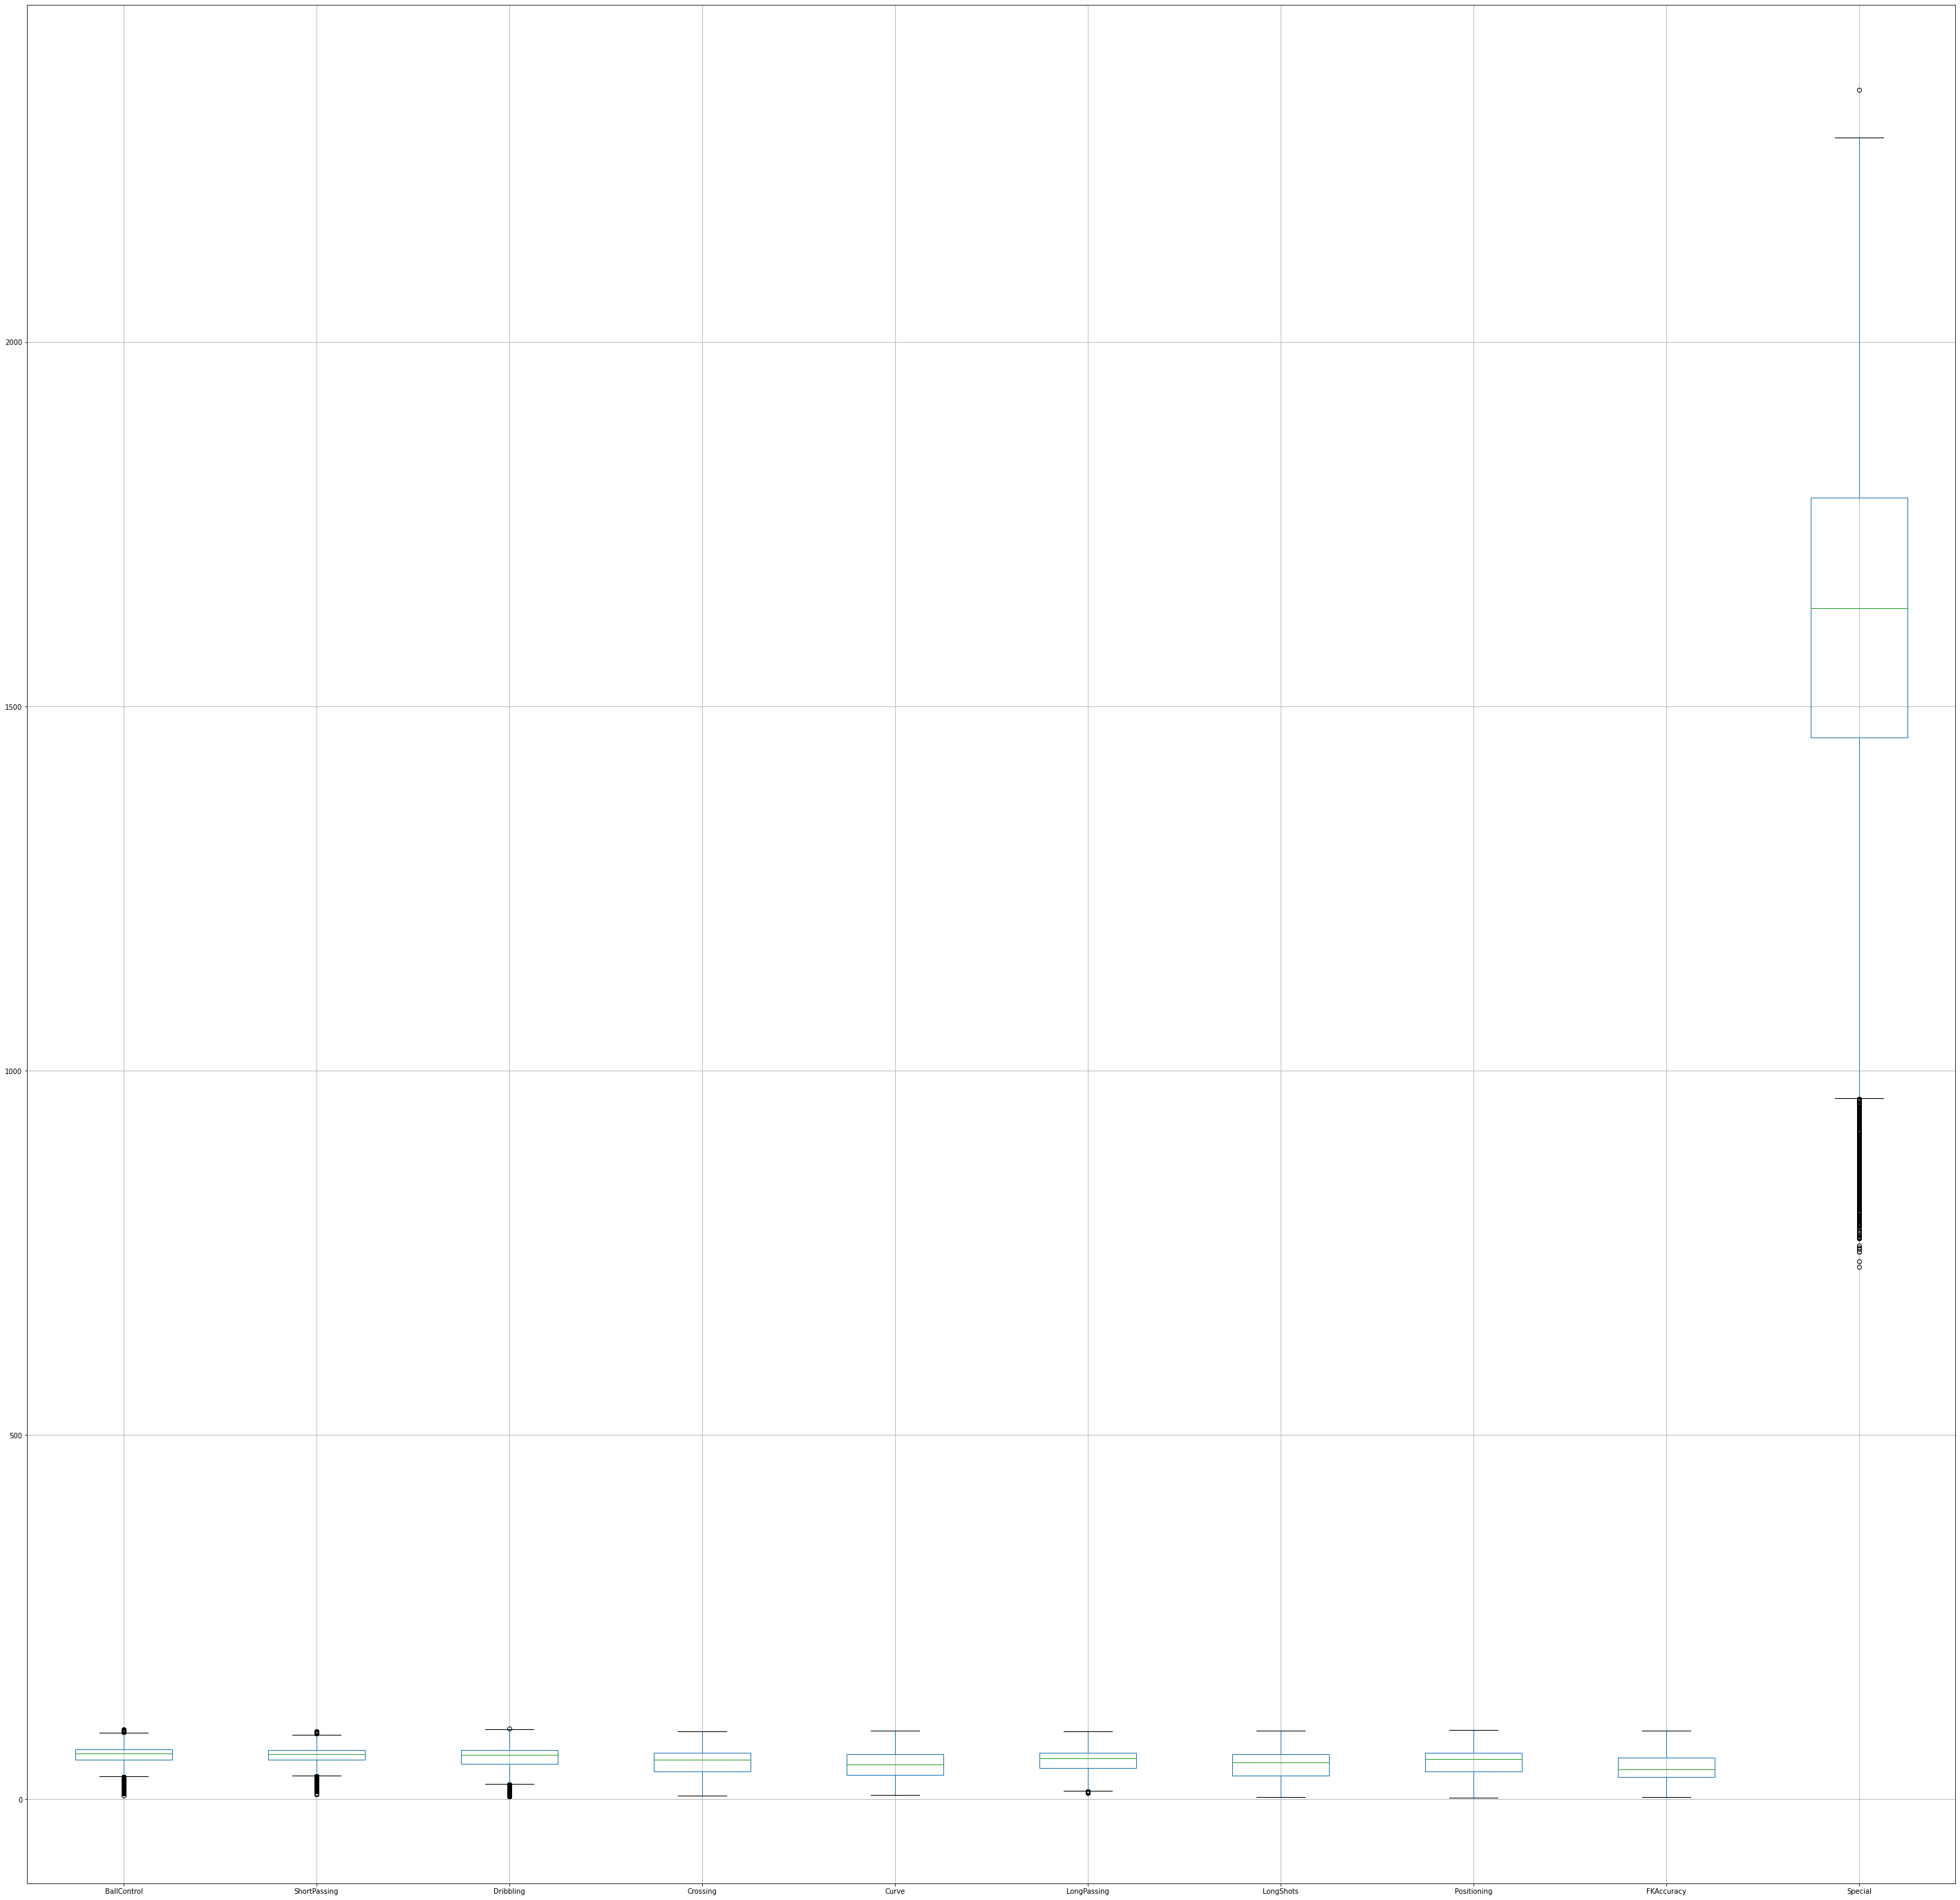

In [ ]:
plt.figure(figsize=(50,50))
df.boxplot()

Special target needs to remove the outliers

In [ ]:
def outlier_remove(df, n,name):
  mean=df[name].mean() # Calclute mean of column
  sd=df[name].std() # Calclute standard deviation of column
  drop_r = df.index[(mean-n * sd> df[name]) | (mean+n * sd< df[name])]# vertical line is or 
  df.drop(drop_r, axis=0, inplace=True)# dropping rows that dont satisfy the code 
  df.reset_index(inplace=True, drop=True) # Reset index


In [ ]:
outlier_remove(df, n=2.5,name='Special') #based on oil production 
df.describe()

BallControl  ShortPassing  ...    FKAccuracy       Special
count  17752.000000  17752.000000  ...  17752.000000  17752.000000
mean      59.363621     59.513520  ...     43.563091   1614.824865
std       15.486019     13.766375  ...     17.029551    251.218957
min        5.000000      7.000000  ...      3.000000    916.000000
25%       55.000000     54.000000  ...     31.000000   1473.000000
50%       63.000000     63.000000  ...     42.000000   1643.000000
75%       69.000000     68.000000  ...     57.000000   1790.000000
max       96.000000     93.000000  ...     94.000000   2280.000000

[8 rows x 10 columns]

CREATING FEATURES AND TARGET

In [ ]:
features = df

In [ ]:
df_3 = df.copy()

In [ ]:
df_3= df_3.drop(['Special'],axis=1,inplace=True)

In [ ]:
target = df.filter(["Special"])
target.head(4)

Special
0     2202
1     2228
2     2143
3     1471

In [ ]:
target.describe()

Special
count  17752.000000
mean    1614.824865
std      251.218957
min      916.000000
25%     1473.000000
50%     1643.000000
75%     1790.000000
max     2280.000000

4) *STANDARDIZATION *

Generally we only standardize thefeatures but here I standardized everything.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#call StandardScaler. 
X_train_im_Std=scaler.fit_transform(features)
#fit transform 
X_train_im_Std

array([[ 2.36583789,  2.21462359,  2.27828863, ...,  2.31484222,
         2.9618121 ,  2.33737008],
       [ 2.23668551,  1.5608383 ,  1.77322951, ...,  2.36860427,
         1.90479613,  2.44086837],
       [ 2.3012617 ,  1.77876673,  2.22217095, ...,  2.04603196,
         2.55075033,  2.10250858],
       ...,
       [-0.99212416, -1.56280251, -0.63983069, ..., -0.15821223,
        -0.97263623, -1.69508251],
       [-0.47551461, -1.27223127, -0.30312461, ..., -0.37326044,
        -0.67902069, -1.53983507],
       [-0.54009081, -0.83637441, -0.75206605, ..., -0.91088097,
        -0.56157447, -1.16962965]])

Standardization of the attributes have been completed

In [ ]:
X_train_im = pd.DataFrame(X_train_im_Std, columns=df.columns)#numpy(nmerical data) to pd 
#im is numerical dataframe,#Oil_Prod_num.columns -apply on all the column of the newly created data-oil_prod_num(without any categorical values)
#im numerical data frame and convert it to pandas 
#pandas as before imputation
X_train_im.head(2)

BallControl  ShortPassing  Dribbling  ...  Positioning  FKAccuracy   Special
0     2.365838      2.214624   2.278289  ...     2.314842    2.961812  2.337370
1     2.236686      1.560838   1.773230  ...     2.368604    1.904796  2.440868

[2 rows x 10 columns]

In [ ]:
X_train_im.describe()

BallControl  ShortPassing  ...    FKAccuracy       Special
count  1.775200e+04  1.775200e+04  ...  1.775200e+04  1.775200e+04
mean  -7.501760e-16  6.714123e-16  ...  1.131487e-15  1.215279e-15
std    1.000028e+00  1.000028e+00  ...  1.000028e+00  1.000028e+00
min   -3.510596e+00 -3.814730e+00  ... -2.381991e+00 -2.781815e+00
25%   -2.817860e-01 -4.005176e-01  ... -7.377438e-01 -5.645627e-01
50%    2.348235e-01  2.532677e-01  ... -9.178959e-02  1.121569e-01
75%    6.222807e-01  6.164818e-01  ...  7.890570e-01  6.973203e-01
max    2.365838e+00  2.432552e+00  ...  2.961812e+00  2.647865e+00

[8 rows x 10 columns]

Previously there was a differnece between the count of rows that has now been solved. How we could have applied SMOTE for upsampling or NearMiss for downsampling or resample as shown here to handle this class imbalance problem.

In [ ]:
df_minority =df["BallControl"] #features have been defined as minority as they have a count of 17748


df_majority =df["Special"]#target has been defined as majority as they have a count of 17796

DEFINING X variable

In [ ]:
x = X_train_im
x.head()
x.describe()

BallControl  ShortPassing  ...    FKAccuracy       Special
count  1.775200e+04  1.775200e+04  ...  1.775200e+04  1.775200e+04
mean  -7.501760e-16  6.714123e-16  ...  1.131487e-15  1.215279e-15
std    1.000028e+00  1.000028e+00  ...  1.000028e+00  1.000028e+00
min   -3.510596e+00 -3.814730e+00  ... -2.381991e+00 -2.781815e+00
25%   -2.817860e-01 -4.005176e-01  ... -7.377438e-01 -5.645627e-01
50%    2.348235e-01  2.532677e-01  ... -9.178959e-02  1.121569e-01
75%    6.222807e-01  6.164818e-01  ...  7.890570e-01  6.973203e-01
max    2.365838e+00  2.432552e+00  ...  2.961812e+00  2.647865e+00

[8 rows x 10 columns]

In [ ]:
x.head()

BallControl  ShortPassing  Dribbling  ...  Positioning  FKAccuracy   Special
0     2.365838      2.214624   2.278289  ...     2.314842    2.961812  2.337370
1     2.236686      1.560838   1.773230  ...     2.368604    1.904796  2.440868
2     2.301262      1.778767   2.222171  ...     2.046032    2.550750  2.102509
3    -1.121277     -0.691089  -2.155008  ...    -2.093646   -1.442421 -0.572524
4     2.236686      2.141981   2.166053  ...     1.938508    2.080965  2.098528

[5 rows x 10 columns]

In [ ]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=17748,    # to match majority class
                                 random_state=42)

In [ ]:
y = df_majority_downsampled
y.head()
y.describe()

count    17748.000000
mean      1611.259748
std        253.236032
min        916.000000
25%       1466.000000
50%       1640.000000
75%       1792.000000
max       2280.000000
Name: Special, dtype: float64

In [ ]:
y.head()

15795    1470
860      2114
5390     1664
11964    1630
11284    1721
Name: Special, dtype: int64

I did downsampling of the majority and made both x and y equal

In [ ]:
X_train_im.describe()

BallControl  ShortPassing  ...    FKAccuracy       Special
count  1.775200e+04  1.775200e+04  ...  1.775200e+04  1.775200e+04
mean  -7.501760e-16  6.714123e-16  ...  1.131487e-15  1.215279e-15
std    1.000028e+00  1.000028e+00  ...  1.000028e+00  1.000028e+00
min   -3.510596e+00 -3.814730e+00  ... -2.381991e+00 -2.781815e+00
25%   -2.817860e-01 -4.005176e-01  ... -7.377438e-01 -5.645627e-01
50%    2.348235e-01  2.532677e-01  ... -9.178959e-02  1.121569e-01
75%    6.222807e-01  6.164818e-01  ...  7.890570e-01  6.973203e-01
max    2.365838e+00  2.432552e+00  ...  2.961812e+00  2.647865e+00

[8 rows x 10 columns]

SPLITTING TESTING AND TRAINING DATA


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_im,target, test_size=0.2)

In [ ]:
X_train_im.count

<bound method DataFrame.count of        BallControl  ShortPassing  Dribbling  ...  Positioning  FKAccuracy   Special
0         2.365838      2.214624   2.278289  ...     2.314842    2.961812  2.337370
1         2.236686      1.560838   1.773230  ...     2.368604    1.904796  2.440868
2         2.301262      1.778767   2.222171  ...     2.046032    2.550750  2.102509
3        -1.121277     -0.691089  -2.155008  ...    -2.093646   -1.442421 -0.572524
4         2.236686      2.141981   2.166053  ...     1.938508    2.080965  2.098528
5         2.172109      2.432552   1.885465  ...     1.508411    2.022242  2.647865
6         1.590924      1.342910   0.370288  ...     0.486932    1.669904  2.333389
7        -2.800258     -2.216588  -2.491714  ...    -2.147408   -1.736037 -1.129823
8         1.913805      1.706124   1.604876  ...     2.153556    2.492027  2.138335
9         1.978381      2.359909   1.380406  ...     1.508411    2.374581  2.289602
10        1.074314      1.415553  -0.190889

In [ ]:
target.count

<bound method DataFrame.count of        Special
0         2202
1         2228
2         2143
3         1471
4         2142
5         2280
6         2201
7         1331
8         2152
9         2190
10        1946
11        2115
12        2189
13        2092
14        2165
15        2246
16        1328
17        1311
18        2065
19        2161
20        1473
21        2107
22        1841
23        2118
24        2146
25        2170
26        2171
27        2017
28        2137
29        2117
...        ...
17722     1374
17723     1370
17724     1225
17725     1218
17726     1178
17727     1166
17728      987
17729     1296
17730     1311
17731     1368
17732     1315
17733     1389
17734     1366
17735     1297
17736     1290
17737     1285
17738     1250
17739     1325
17740     1191
17741     1325
17742     1333
17743     1362
17744     1303
17745     1203
17746     1098
17747     1307
17748     1098
17749     1189
17750     1228
17751     1321

[17752 rows x 1 columns]>

APPLYING TWO ALGORITHIMS WITH GRIS SEARCH CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from scipy.stats import randint
np.random.seed(42)
model = xgb.XGBRegressor(random_state=42)
import warnings
warnings.filterwarnings('ignore')

param_grid = [{
'learning_rate': randint(low=0.1, high=20),'n_estimators': randint(low=0.1, high=20), 'algorithm': ['SAMME', 'SAMME.R']
               }]
gs = RandomizedSearchCV(model,param_grid,cv=5, n_iter = 150, scoring="r2",random_state=42)
gs.fit(X_train, y_train)
gs.best_params_

[18:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 15}

In [ ]:

clf = xgb.XGBRegressor(random_state=42,n_estimators=4, learning_rate=1, algorithm = 'SAMME.R')
clf.fit(X_train,y_train)

r_2=cross_val_score(clf,X_train,y_train, cv=5, scoring="r2")
xbg=np.mean(r_2)
xbg

[18:58:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.986660126910377

Here XGBoost shows a r^2 value of 0.987. It is a good classifier to handle this non-linear data problem.

Overall, I really liekd working with such a huge dataset. I could have handled missing values better using knn and linear imputtaion for numerical data and better techniques for non-numerical. 

References:
- https://elitedatascience.com/imbalanced-classes
